# **Project Name**    -

Airbnb Booking Analysis

##### **Project Type**    - EDA
##### **Contribution**    - Priya Saxena


# **Project Summary -**

Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world.
Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company.
These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Based on the data we try to find out and make a analysis of the dataset of booking details**


Like we have to find correlation between different variables. To see what are the traffic distance among different areas and what is the reason behind it.
And to make analysis of which host charges the higher price, which host is busiest and what is the reason.
what can we learn about different hosts and areas.


#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


dataset = pd.read_csv('/content/drive/MyDrive/AirbnbDataSet.csv')


Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

(48895, 16)

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

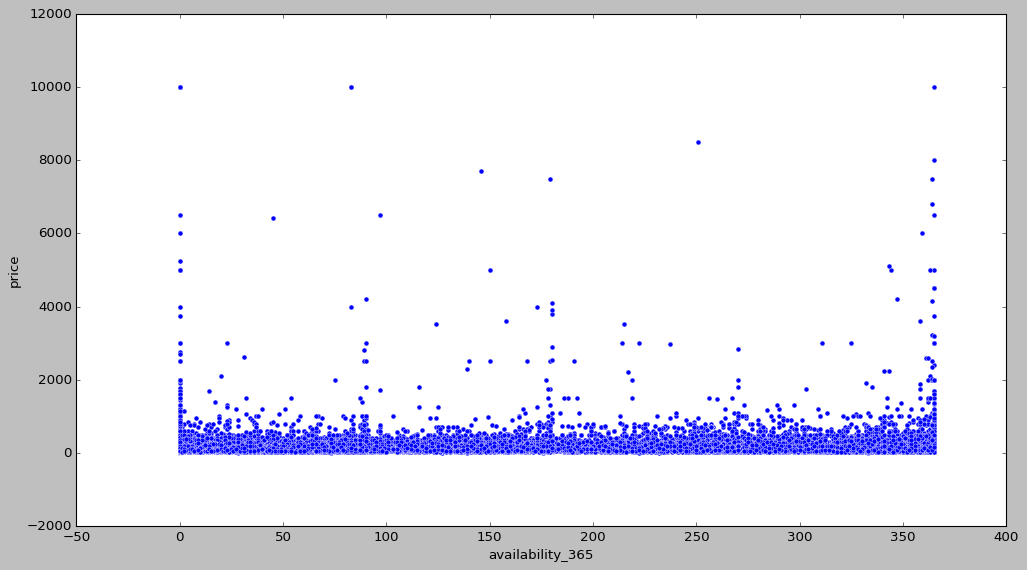

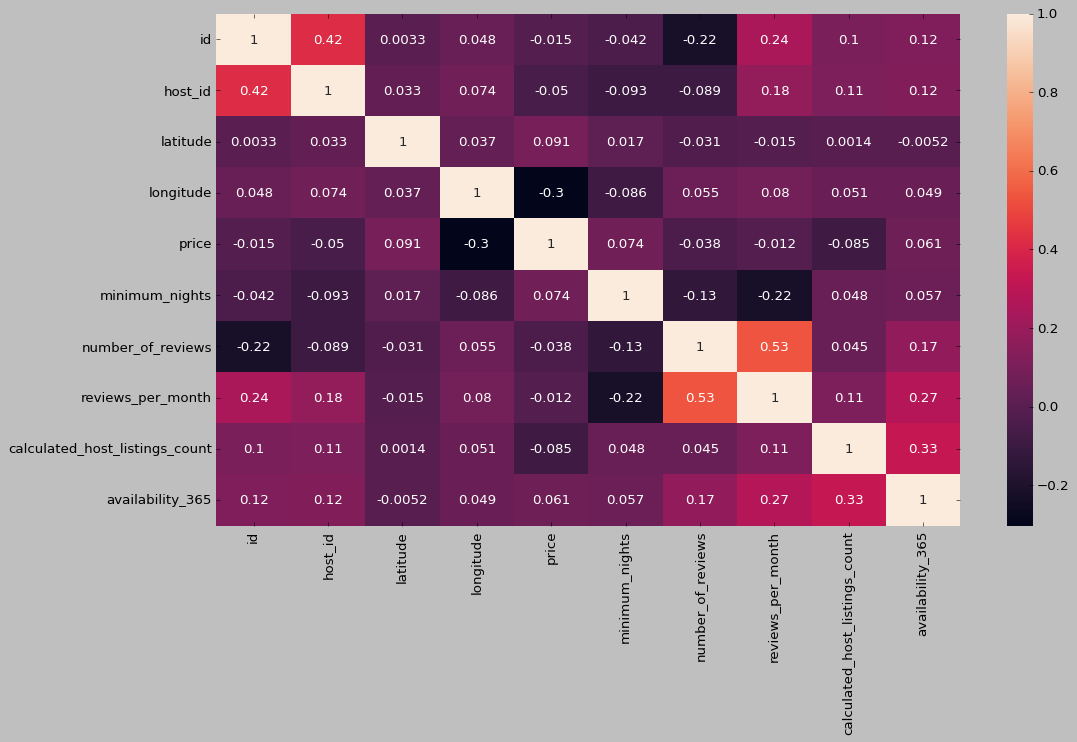

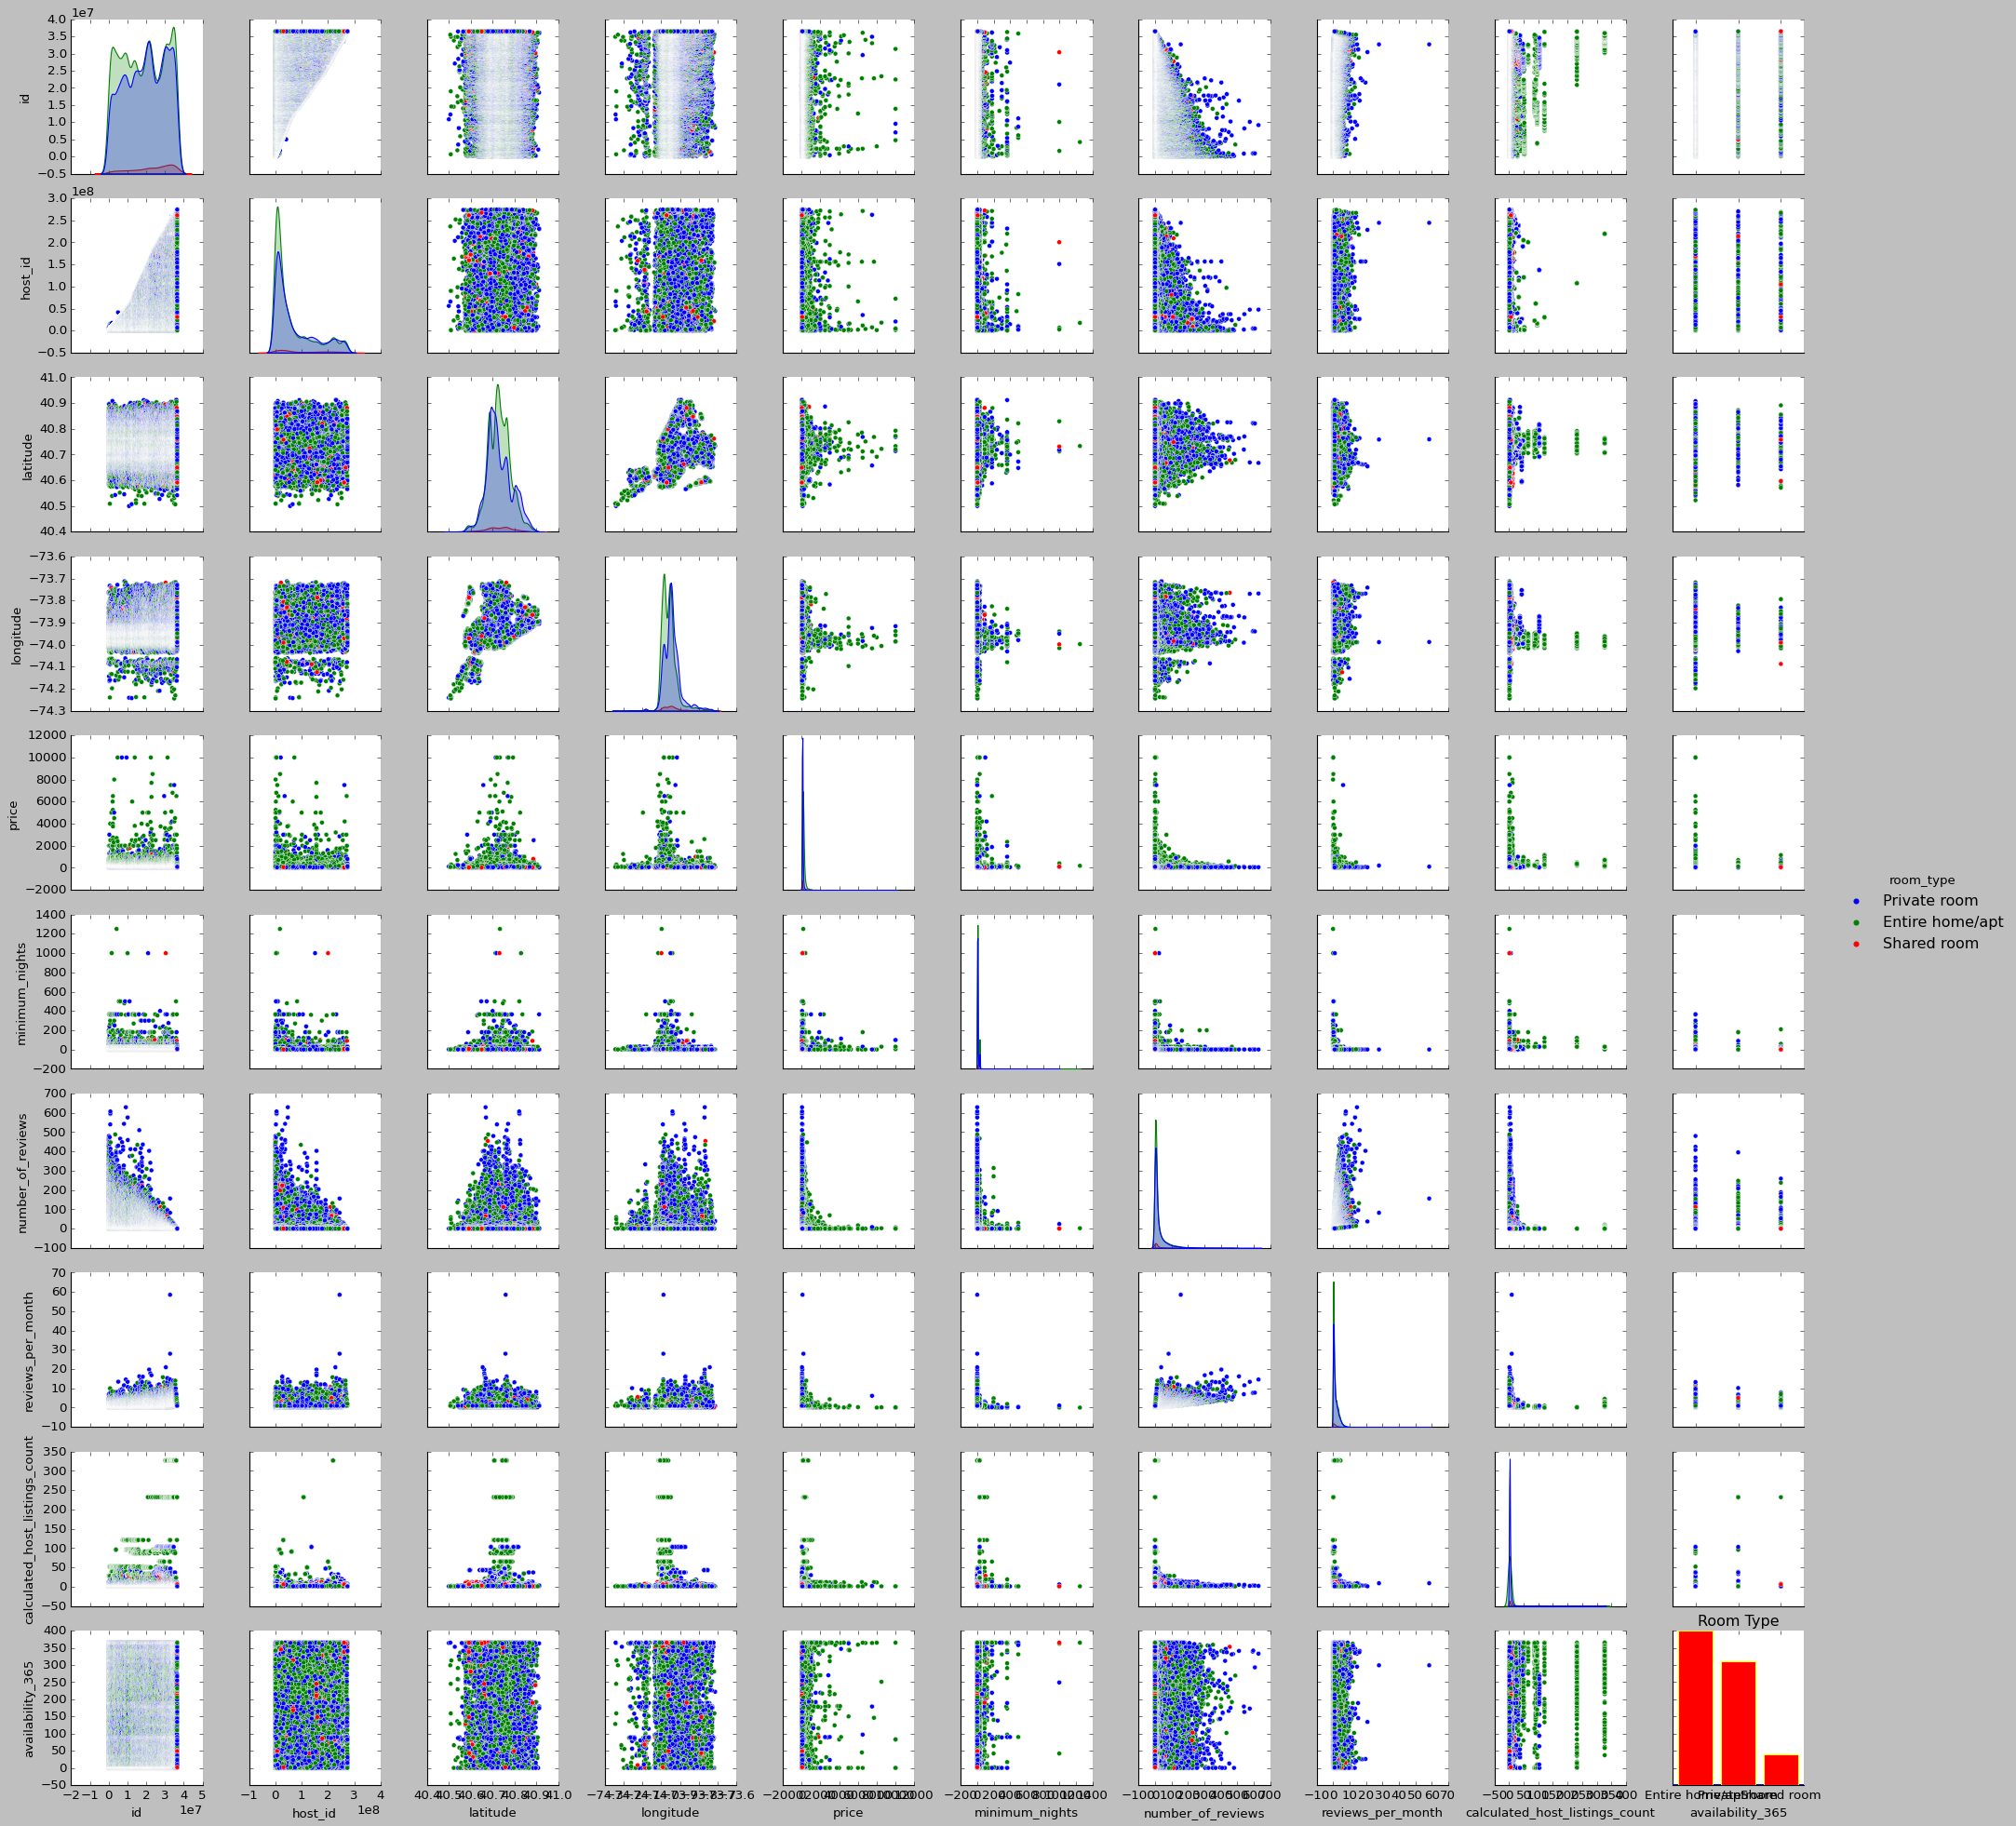

In [ ]:

neighbourhood_group = ['Brooklyn', 'Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Staten Island', 'Queens', 'Bronx', 'Queens', 'Bronx']
room_type = ['Entire home/apt', 'Entire home/apt', 'Private room', 'Private room', 'Private room', 'Entire home/apt', 'Entire home/apt', 'Private room', 'Shared room', 'Entire home/apt']

room_dict = {}

for i in room_type:
    room_dict[i] = room_dict.get(i, 0) + 1

plt.bar(room_dict.keys(), room_dict.values(), color='red', edgecolor='yellow')
plt.title('Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


### What did you know about your dataset?

Answer Here

We found that Entire home/apt is the highest number of room types overall all the room type like private and shared.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


### Variables Description

Answer Here
host_id refers to the unique host id, host_name is the host name, neighbourhood_group is the location, room_type is type of room shared private etc. number_of_reviews is the number of reviews by users, minimum_nights is the minimum nights to be paid for.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No.of unique values in ",i,"is",dataset[i].nunique())

No.of unique values in  id is 48895
No.of unique values in  name is 47905
No.of unique values in  host_id is 37457
No.of unique values in  host_name is 11452
No.of unique values in  neighbourhood_group is 5
No.of unique values in  neighbourhood is 221
No.of unique values in  latitude is 19048
No.of unique values in  longitude is 14718
No.of unique values in  room_type is 3
No.of unique values in  price is 674
No.of unique values in  minimum_nights is 109
No.of unique values in  number_of_reviews is 394
No.of unique values in  last_review is 1764
No.of unique values in  reviews_per_month is 937
No.of unique values in  calculated_host_listings_count is 47
No.of unique values in  availability_365 is 366


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
area_reviews = dataset.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
area_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


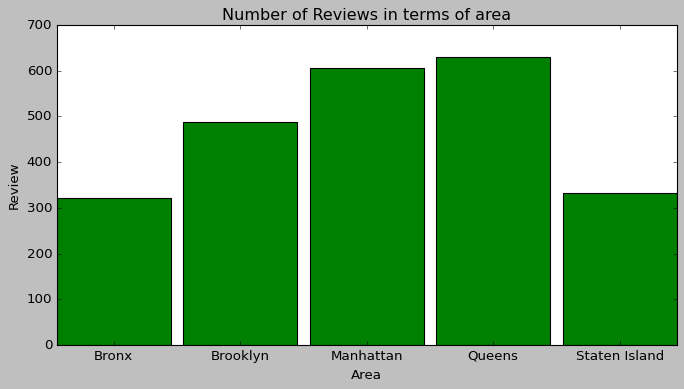

In [ ]:
area = area_reviews['neighbourhood_group']
review = area_reviews['number_of_reviews']
fig = plt.figure(figsize =(10,5))

plt.bar(area, review, color ="green", width =0.9)
plt.xlabel('Area')
plt.ylabel('Review')
plt.title("Number of Reviews in terms of area")
plt.show()

In [ ]:
price_area = dataset.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(10)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9
5,15,19
6,16,43
7,18,1
8,19,76
9,20,116


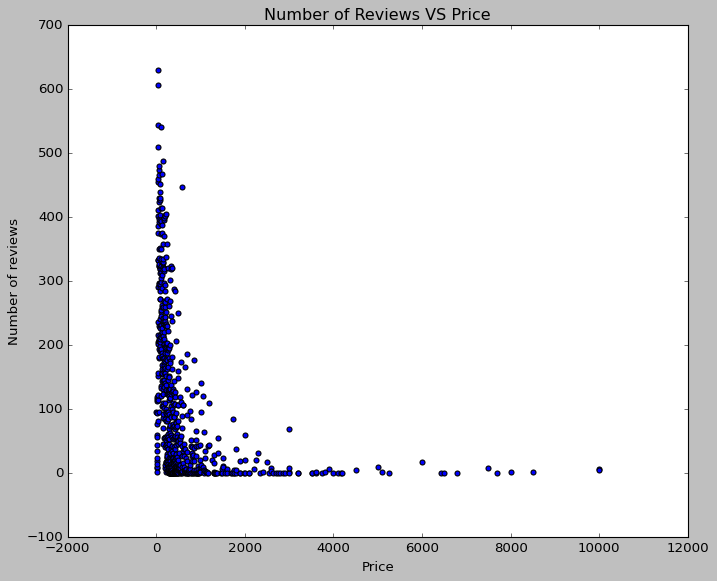

In [ ]:
price_list = price_area['price']
review = price_area['number_of_reviews']
fig =plt.figure(figsize =(10,8))

plt.scatter(price_list, review)
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.title('Number of Reviews VS Price')
plt.show()

### What all manipulations have you done and insights you found?

Answer Here.
From above visualization we can say that most number of people like to stay in less price and their reviews are higher in those areas.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64
 


<Axes: ylabel='room_type'>

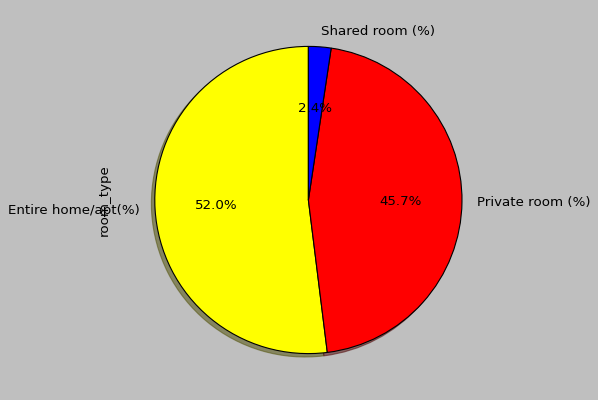

In [ ]:
# Chart - 1 visualization code
print(dataset.room_type.value_counts())
print(" ")
dataset['room_type'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Entire home/apt(%)','Private room (%)','Shared room (%)'],
                               colors=['yellow','red','blue'],
                               explode=[0,0,0]
                              )

##### 1. Why did you pick the specific chart?

Answer Here.
The pie chart is a suitable visualization for this variable because it allows viewers to quickly understand the relative proportions of each room type. The circular shape of the chart makes it easy to compare the sizes of each slice, and the use of different colors or labels can help to distinguish each category

##### 2. What is/are the insight(s) found from the chart?

Answer Here
In Airbnb booking analysis, maximum people gave prefrance to book entire home and apartment with 52.0%,on the second position private rooms are booked by the customer with 45.7%. And only 2.4% people booked shared rooms.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
The insight that customers prefer to book entire homes and apartments and private rooms can provide valuable insights for hosts and Airbnb to optimize their listings and improve profitability by catering to customer preferences.

#### Chart - 2

  neighbourhood_group  Average booking %
0           Manhattan        1279.133004
1              Queens         406.018355
2       Staten Island         231.903485
3            Brooklyn         228.437127
4               Bronx         223.373052
 


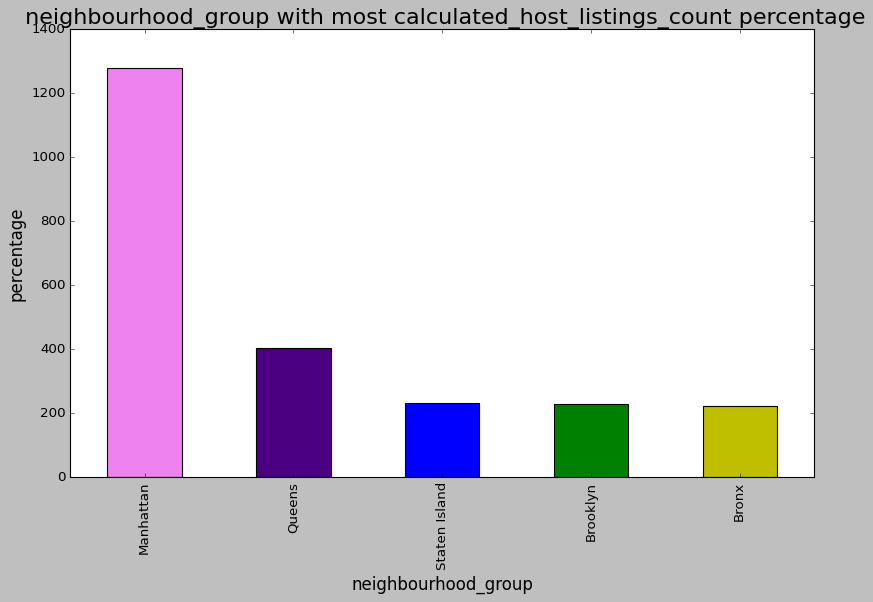

  neighbourhood_group  Average Room_type %
0               Bronx           223.373052
1            Brooklyn           228.437127
2       Staten Island           231.903485
3              Queens           406.018355
4           Manhattan          1279.133004
 


Text(0, 0.5, 'count_of_booking')

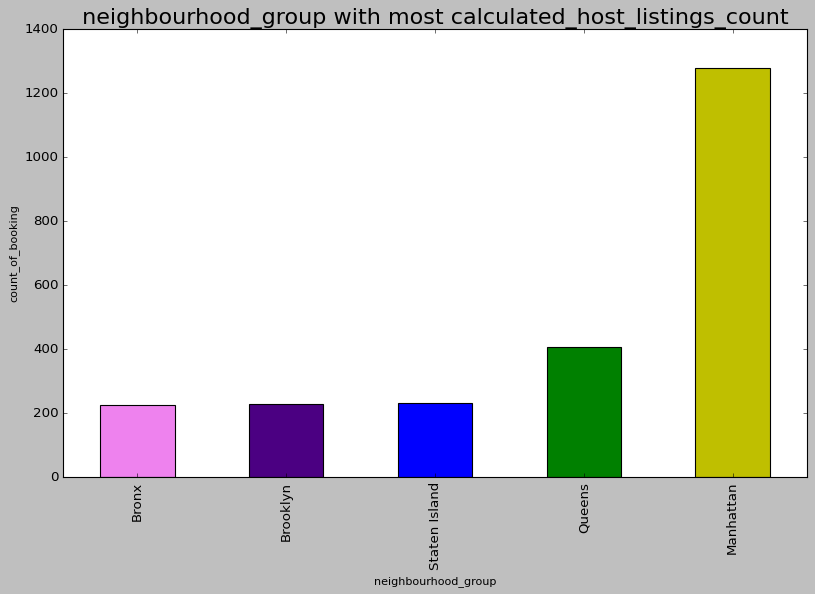

In [ ]:
# Chart - 2 visualization code
print((dataset.groupby(['neighbourhood_group'])['calculated_host_listings_count'].mean()*100).sort_values(ascending = False).reset_index(name="Average booking %").head(10))
print(" ")


# State vs. average true churn percantage visualization code
# Vizualizing top 10 churned state
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((dataset.groupby(['neighbourhood_group'])['calculated_host_listings_count'].mean())*100).sort_values(ascending = False).head(10).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" neighbourhood_group with most calculated_host_listings_count percentage", fontsize = 20)
plt.xlabel('neighbourhood_group', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

print((dataset.groupby(['neighbourhood_group'])['calculated_host_listings_count'].mean()*100).sort_values(ascending = True).reset_index(name="Average Room_type %").head(10))
print(" ")



# State vs. average true churn percantage visualization code
# Vizualizing bottom 10 churned state
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((dataset.groupby(['neighbourhood_group'])['calculated_host_listings_count'].mean())*100).sort_values(ascending = True).head(10).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" neighbourhood_group with most calculated_host_listings_count ", fontsize = 20)
plt.xlabel('neighbourhood_group', fontsize = 10)
plt.ylabel('count_of_booking', fontsize = 10)

##### 1. Why did you pick the specific chart?

Answer Here.
The calculated_host_listings_count column represents the number of listings by a particular host in the Airbnb platform, while the neighbourhood_group column represents the different groups of neighborhoods in a particular city.
By plotting a bar plot chart between these two variables, we can quickly see which neighborhood group has the highest number of listings per host and which has the lowest. It can also help identify any outliers in the data, such as hosts with an unusually high or low number of listings.
This information can be helpful for both hosts and guests. Hosts can use this information to see how their listing(s) compare to other hosts in their neighborhood group, while guests can use this information to make more informed decisions when selecting a neighborhood to stay in based on the number of available listings per host.

##### 2. What is/are the insight(s) found from the chart?

Answer Here


we can see people gave maximum prefrance to the Manattan neighborhood, On the second position Queens neighborhood.Neighborhood like Boronx, Brooklyn and Staten Island have almost similar count of bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

It helps them understand the most popular and in-demand neighborhoods for their users. This information can help Airbnb make informed decisions about where to focus their marketing efforts and investment in terms of adding new listings or improving existing ones.
This information can help Airbnb optimize their pricing strategy in different neighborhoods. They can use this information to set prices that reflect the demand for each neighborhood and adjust prices during peak times to maximize revenue.

Overall, while understanding the booking preferences of users in different neighborhoods can be valuable for Airbnb, it is important for the company to carefully consider both the positive and negative impacts of this information on their business and their users.

#### Chart - 3

room_type      
Entire home/apt    24465
Private room       21052
Shared room          974
dtype: int64
 


<Axes: >

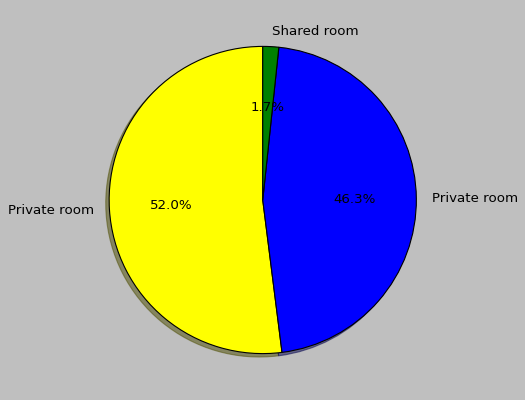

In [ ]:
# Chart - 3 visualization code
print(dataset[dataset['availability_365']<=359].loc[:,['room_type']].value_counts())
print(" ")


dataset[dataset['availability_365']<=9].loc[:,['room_type']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Private room','Private room','Shared room'],
                               colors=['yellow','blue','green'],
                               explode=[0,0,0]
                              )


room_type      
Entire home/apt    25394
Private room       22281
Shared room         1159
dtype: int64
 


<Axes: >

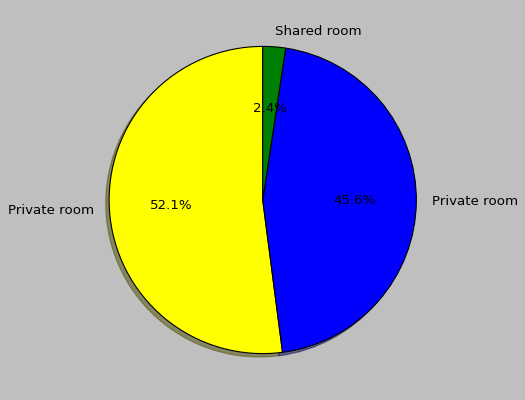

In [ ]:
print(dataset[dataset['number_of_reviews']<=359].loc[:,['room_type']].value_counts())
print(" ")


dataset[dataset['number_of_reviews']<=190].loc[:,['room_type']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Private room','Private room','Shared room'],
                               colors=['yellow','blue','green'],
                               explode=[0,0,0]
                              )

##### 1. Why did you pick the specific chart?

Answer Here.
In the case of Airbnb booking analysis, the pie chart can be used to visualize the proportion of each room type available for booking, such as private room, shared room, or entire home/apartment.
The circular shape of the chart makes it easy to compare the sizes of each slice, and the use of different colors or labels can help to distinguish each category.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
A pie chart of room type can provide insights into the distribution of different types of accommodations. It can show the proportion of accommodations that are private rooms, shared rooms, or entire homes or apartments, which can be useful for understanding the different types of accommodations that are available and which types are most popular. For example, it may show that most accommodations are entire homes or apartments, or that there is a relatively even distribution of different types of accommodations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Insights from a pie chart of number of reviews can help businesses understand the popularity of their accommodations and how they compare to competitors. If the pie chart shows that a large proportion of accommodations have a high number of reviews, a business may want to prioritize getting more reviews in order to stay competitive. On the other hand, if the pie chart shows that many accommodations have fewer reviews, a business may be able to gain a competitive advantage by actively soliciting more reviews from satisfied customers.

Insights from a pie chart of room type can help businesses understand the types of accommodations that are most popular among Airbnb users. If the pie chart shows that most accommodations are entire homes or apartments, a business may want to consider focusing on that type of accommodation to appeal to a larger customer base. On the other hand, if the pie chart shows that shared rooms or private rooms are more popular, a business may want to consider offering more of those types of accommodations to stay competitive in the market.

#### Chart - 4

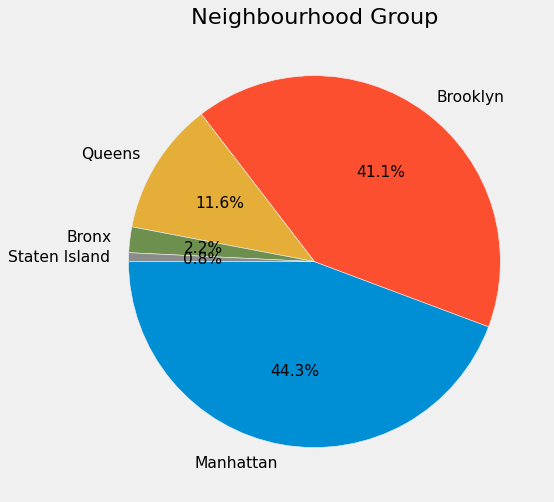

In [ ]:
# Chart - 4 visualization code
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,7))
plt.title("Neighbourhood Group")
g = plt.pie(dataset.neighbourhood_group.value_counts(), labels=dataset.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
A pie chart is a circular chart that is divided into slices to represent the proportion of each category in a dataset. In the case of Airbnb booking analysis, the pie chart can be used to visualize the proportion of each room type available for booking, such as private room, shared room, or entire home/apartment.

The pie chart is a suitable visualization for this variable because it allows viewers to quickly understand the relative proportions of each room type. The circular shape of the chart makes it easy to compare the sizes of each slice, and the use of different colors or labels can help to distinguish each category.

##### 2. What is/are the insight(s) found from the chart?

Answer Here


As we can see Manhattan neighourhood is more popular in people with 44.3%, Brooklyn neighourhood is at second position with percentage 41.1,third most neighourhood in people is Queens,then Bronx and Staten Island respectively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights gained from the pie chart of the popularity of different neighborhoods in New York City, specifically that Manhattan and Brooklyn are the most popular neighborhoods among Airbnb users, can certainly help create a positive business impact for a business operating in the hospitality industry in New York City.

#### Chart - 5

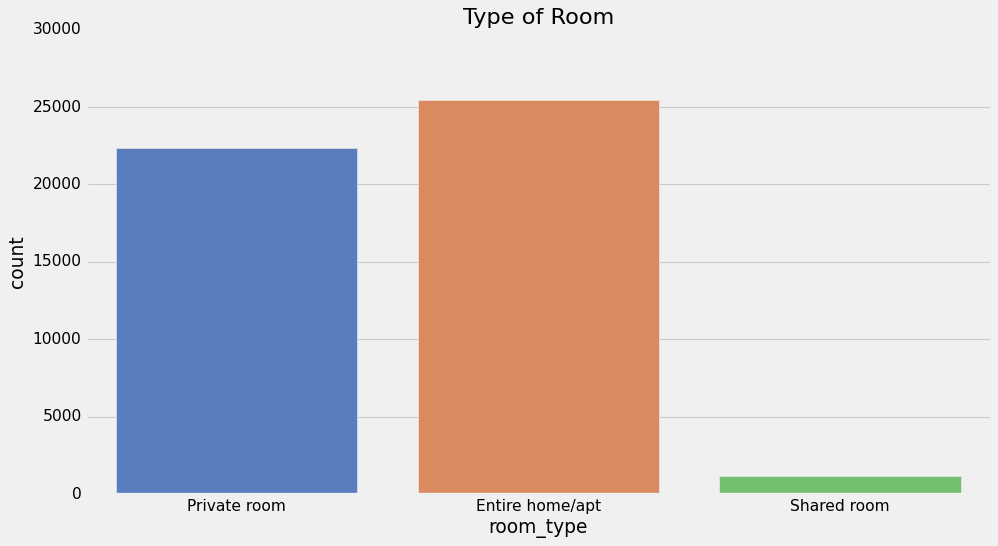

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(x='room_type', data=dataset, palette="muted")
fig = plt.gcf()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar charts are a commonly used visualization tool that are easy to understand and interpret. They are effective in displaying categorical data and can show the relative size of each category.

Bar charts can be used to compare data between different categories, which makes them useful for comparing bookings between different room types.

Bar charts are customizable and can be used to display additional information, such as the total number of bookings or the percentage of bookings for each room type.

Bar charts can also be used to show changes in data over time, by creating a stacked bar chart that shows the breakdown of bookings by room type for each time period.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

25000 above people gave prefarance to book entire hone/apt,and 20000 pluse people booked private rooms and only few people booked shared rooms in airbnb booking.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Positive impact:
By understanding that most users prefer to book entire homes or apartments, Airbnb can adjust their supply to meet the demand and encourage more hosts to list their entire properties. This can help improve the user experience and increase customer satisfaction, which can lead to repeat business and positive reviews. Airbnb can also invest in targeted marketing campaigns to promote the booking of entire homes or apartments, which can lead to an increase in bookings and revenue.

Negative impact:
If Airbnb does not have enough supply of entire homes or apartments to meet the high demand, it can result in frustrated customers who may opt to use other platforms to book their accommodations. This can lead to a loss of revenue for Airbnb and damage to their reputation. The low demand for shared rooms can also have a negative impact if Airbnb has invested heavily in this area. For example, if Airbnb has launched marketing campaigns to promote shared rooms, but the demand remains low, it can result in a waste of resources and a negative return on investment.

#### Chart - 6

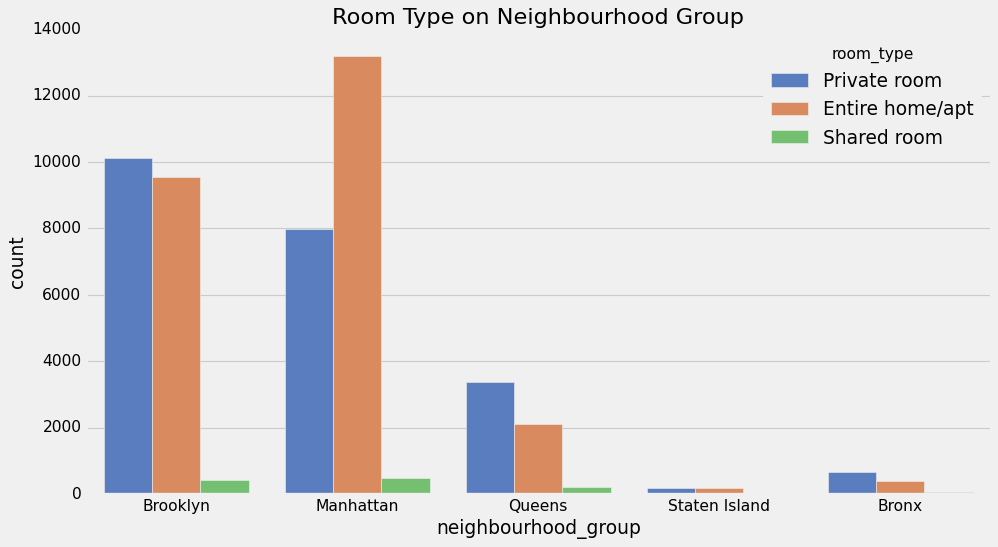

In [ ]:
# Chart - 6 visualization code

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(x='neighbourhood_group', hue='room_type', data=dataset, palette="muted")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

A multi-bar graph could be useful in visualizing the distribution of bookings across different neighborhoods, providing a clear comparison of the popularity of each area.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Insights gained from a multi-bar graph of neighborhood and count of bookings in an Airbnb booking analysis can include identifying the most popular and least popular neighborhoods, understanding which neighborhoods have the highest and lowest demand for Airbnb accommodations, and helping hosts and property managers adjust their pricing, marketing and listing strategies accordingly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, the insights gained from a multi-bar graph of neighborhood and count of bookings in an Airbnb booking analysis can help create a positive or negative business impact. By understanding which neighborhoods have the highest and lowest demand, hosts and property managers can adjust their pricing, marketing and listing strategies to optimize revenue and improve customer satisfaction. However, if certain neighborhoods are consistently underperforming, it may be necessary to reevaluate the suitability of those areas for Airbnb accommodations.

#### Chart - 7

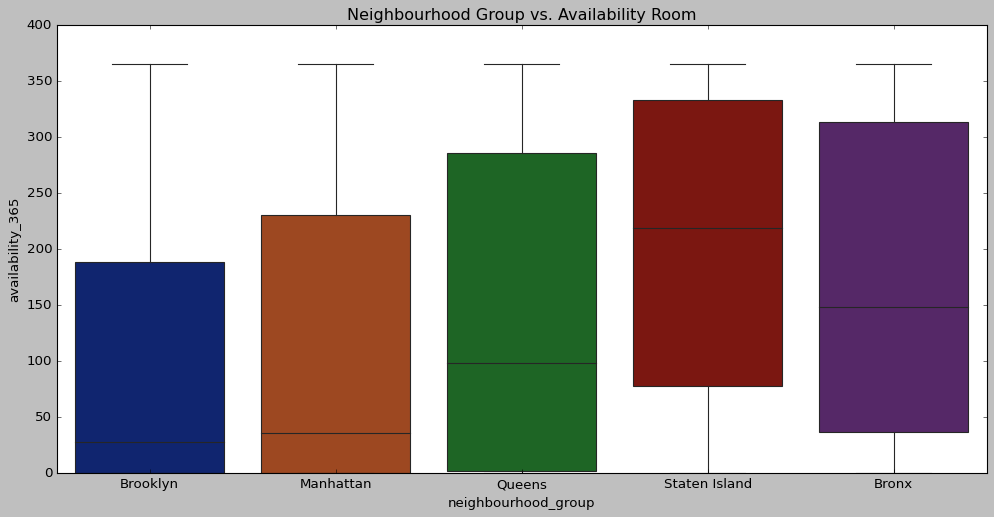

In [ ]:
# Chart - 7 visualization code
plt.style.use('classic')
plt.figure(figsize=(15,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=dataset, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I chose boxplots for the analysis of neighborhood versus availability of rooms in Airbnb bookings because boxplots are an effective way to summarize and visualize the distribution of a dataset, particularly when comparing groups. They allow for easy identification of outliers and the examination of quartiles, median, and range of values. In this case, boxplots can help identify any differences in the availability of rooms across different neighborhoods and provide insights into potential patterns or trends that can inform decision-making for both hosts and guests.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Identifying neighborhoods with consistently high or low availability, uncovering seasonal availability patterns, or detecting any potential outliers that may require further investigation.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights gained from the analysis of neighborhood versus availability of rooms in Airbnb bookings using boxplots can have both positive and negative impacts on the business. On the positive side, identifying neighborhoods with consistently high availability can help hosts make informed decisions on pricing and marketing strategies, ultimately increasing their revenue. On the negative side, discovering neighborhoods with low availability may negatively impact the booking experience for guests, leading to a decrease in customer satisfaction and potentially a decrease in bookings. Overall, the insights gained from the analysis can help inform strategic decision-making for both hosts and Airbnb as a business

#### Chart - 8

<Figure size 1040x560 with 0 Axes>

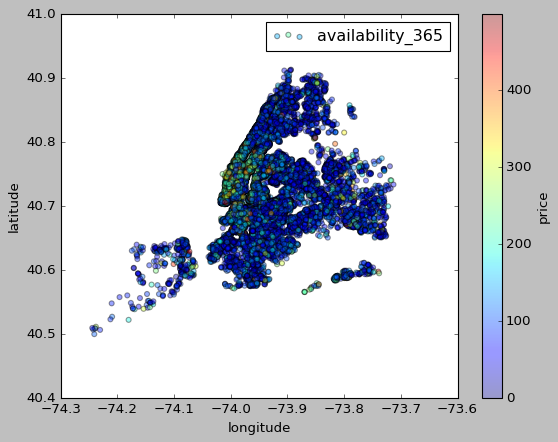

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(13,7))

ax=dataset[dataset.price<500].plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
ax.legend()
plt.ioff()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I picked a scatter plot to visualize the relationship between the longitude, latitude, availability_365, and price variables in Airbnb booking analysis because it is an effective way to display the correlation and distribution of data points in two dimensions. By plotting the longitude and latitude on the x and y-axis, respectively, we can display the geographic distribution of the Airbnb listings. By incorporating the availability_365 and price variables as the color and size of the data points, we can observe any patterns or trends in their relationships with the location of the listings

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Identifying clusters of high or low availability and pricing, exploring any relationships between geographic location and listing popularity, or uncovering any potential outliers that may require further investigation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights gained from the analysis of the scatter plot for longitude, latitude, label, availability_365, and price in Airbnb booking analysis can have both positive and negative impacts on the business. For example, identifying popular and less popular locations can help hosts optimize their pricing and marketing strategies, ultimately increasing revenue. However, identifying a cluster of listings with low availability and high pricing may negatively impact the booking experience for guests, leading to a decrease in customer satisfaction and potentially a decrease in bookings

#### Chart - 9

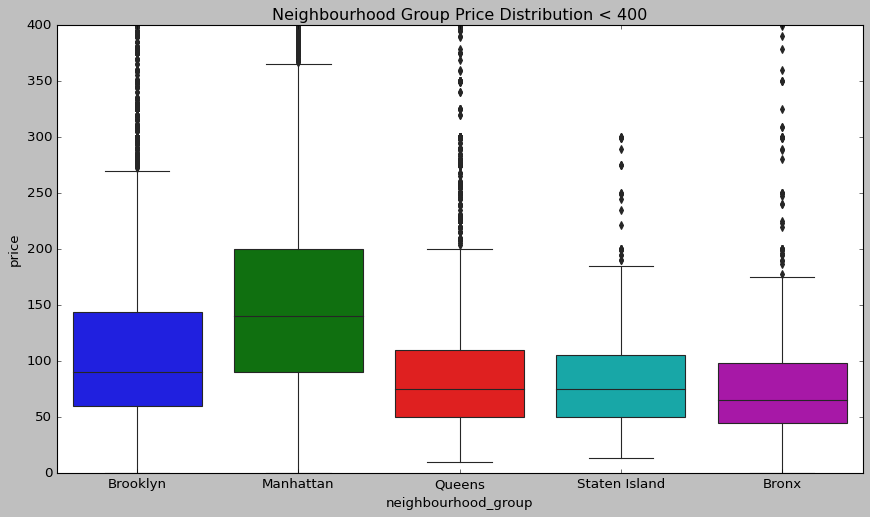

In [ ]:
# Chart - 9 visualization code

plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group Price Distribution < 400")
sns.boxplot(y="price",x ='neighbourhood_group' ,data = dataset[dataset.price<400])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I chose boxplots for the analysis of price and neighborhood group in Airbnb booking analysis because boxplots are an effective way to compare the distribution of a continuous variable (price) across different categories (neighborhood group), allowing for easy identification of differences and potential outliers in pricing patterns.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Identifying neighborhoods with higher or lower pricing, detecting potential outliers that may require further investigation, and understanding the overall distribution of pricing patterns across different neighborhood groups. These insights can inform pricing and marketing strategies for hosts and help Airbnb make data-driven decisions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights gained from the analysis of the boxplot for price and neighborhood group in Airbnb booking analysis can have both positive and negative impacts on the business. For example, identifying neighborhoods with higher pricing can help hosts optimize their pricing strategies, ultimately increasing revenue. However, if the analysis reveals that certain neighborhoods have significantly lower pricing, this may indicate a lack of demand in that area, potentially leading to decreased bookings

#### Chart - 10

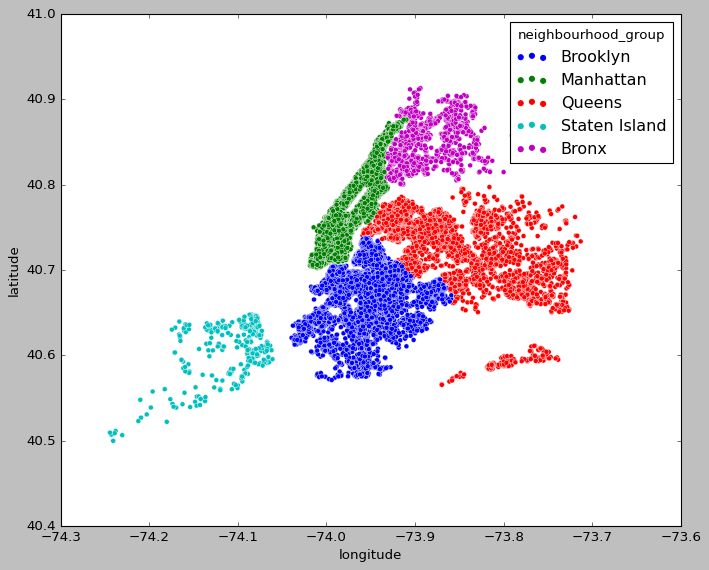

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(10,8))
sns.scatterplot(x=dataset.longitude,y=dataset.latitude,hue=dataset.neighbourhood_group)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

By plotting the longitude and latitude on the x and y-axis, respectively, we can display the geographic distribution of the Airbnb listings. By incorporating the availability_365 and price variables as the color and size of the data points, we can observe any patterns or trends in their relationships with the location of the listings.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Identifying clusters of high or low availability and pricing, exploring any relationships between geographic location and listing popularity, or uncovering any potential outliers that may require further investigation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights gained from the analysis of the scatter plot for longitude, latitude, label, availability_365, and price in Airbnb booking analysis can have both positive and negative impacts on the business. For example, identifying popular and less popular locations can help hosts optimize their pricing and marketing strategies, ultimately increasing revenue. However, identifying a cluster of listings with low availability and high pricing may negatively impact the booking experience for guests, leading to a decrease in customer satisfaction and potentially a decrease in bookings

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

figsize=(10,8)
sns.boxenplot(x='price',data=dataset)

<Axes: xlabel='price'>

##### 1. Why did you pick the specific chart?

Answer Here.

I may have chosen a boxenplot for the analysis of price in Airbnb booking analysis because it is a more detailed version of a boxplot, showing the distribution of data in greater detail. The boxenplot displays not only the median and quartiles, but also the shape of the distribution beyond the quartiles, allowing for a more comprehensive understanding of the data. This can be particularly useful in identifying potential outliers and understanding the spread of the data, ultimately leading to more informed decision-making.



##### 2. What is/are the insight(s) found from the chart?

Answer Here

Identifying the range and distribution of prices, detecting any potential outliers that may require further investigation, and understanding the spread and shape of the data. These insights can inform pricing and marketing strategies for hosts and help Airbnb make data-driven decisions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights gained from the analysis of the boxenplot for price in Airbnb booking analysis can have both positive and negative impacts on the business. For example, identifying the range and distribution of prices can help hosts optimize their pricing strategies, ultimately increasing revenue. However, if the analysis reveals that prices are consistently high or low, this may impact the booking experience for guests, leading to a decrease in customer satisfaction and potentially a decrease in booking

#### Chart - 12

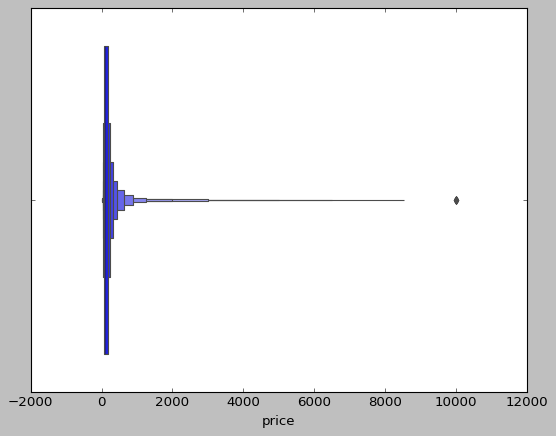

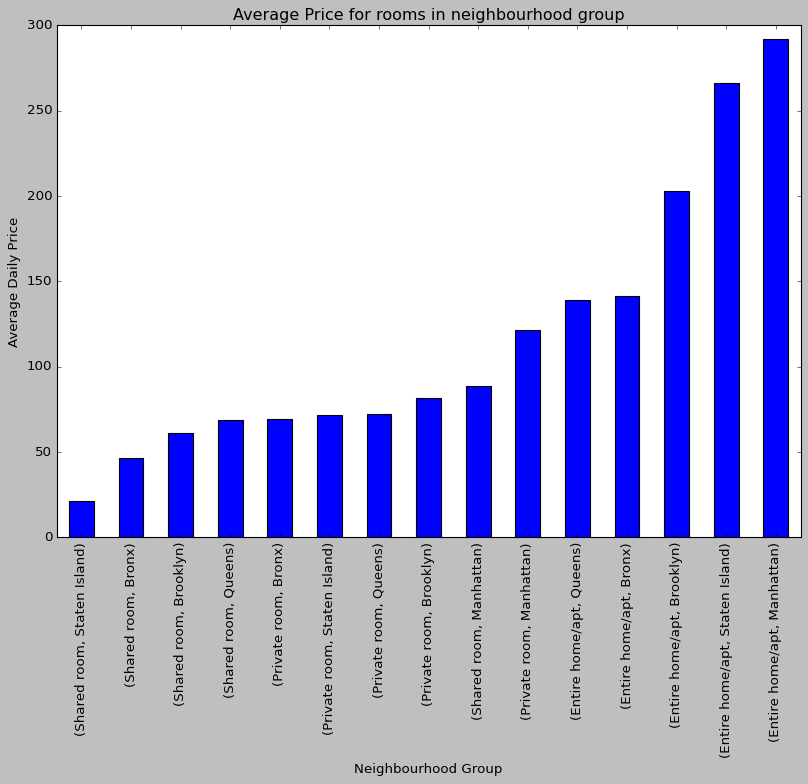

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group            
Entire home/apt Queens               139.036260
                Bronx                141.541176
                Brooklyn             202.895245
                Staten Island        266.205128
                Manhattan            291.784595
Private room    Bronx                 69.025862
                Staten Island         71.394366
                Queens                72.454958
                Brooklyn              81.713284
                Manhattan            121.434183
Shared room     Staten Island         21.000000
                Bronx                 46.711111
                Brooklyn              60.921212
                Queens                68.459459
                Manhattan             88.462898

In [ ]:
# Chart - 12 visualization code

dataset.head()
plt.figure(figsize=(12,8))
df = dataset[dataset['minimum_nights']==1]
df1 = df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df1).sort_values(by='room_type')

Top 20 most expensive locality in Airbnb listing are :


<ipython-input-64-09d3c1efb4a1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4 = dataset.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",


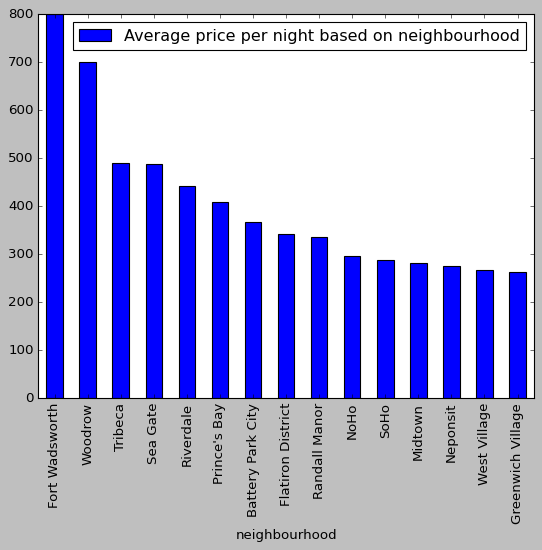

,Average price per night based on neighbourhood
neighbourhood,
Fort Wadsworth,800.000000
Woodrow,700.000000
Tribeca,490.638418
Sea Gate,487.857143
Riverdale,442.090909
Prince's Bay,409.500000
Battery Park City,367.557143
Flatiron District,341.925000
Randall Manor,336.000000


In [ ]:

print('Top 20 most expensive locality in Airbnb listing are :')
df4 = dataset.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                              ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(15)

df4.plot(kind='bar')
plt.show()
pd.DataFrame(df4)

Least expensive neighbourhood according to Airbnb listing are


<ipython-input-65-17162df88cfc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4 = dataset.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",


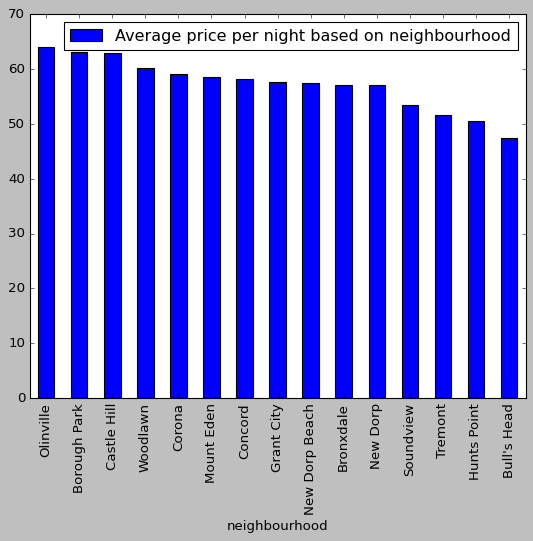

,Average price per night based on neighbourhood
neighbourhood,
Olinville,64.000000
Borough Park,63.066176
Castle Hill,63.000000
Woodlawn,60.090909
Corona,59.171875
Mount Eden,58.500000
Concord,58.192308
Grant City,57.666667
New Dorp Beach,57.400000


In [ ]:
print('Least expensive neighbourhood according to Airbnb listing are')
df4 = dataset.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                              ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).tail(15)

df4.plot(kind='bar')
plt.show()
pd.DataFrame(df4)

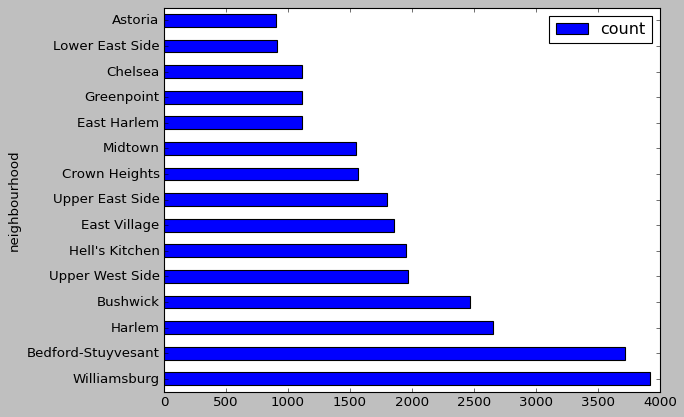

,count
neighbourhood,
Williamsburg,3919
Bedford-Stuyvesant,3714
Harlem,2656
Bushwick,2464
Upper West Side,1970
Hell's Kitchen,1955
East Village,1853
Upper East Side,1797
Crown Heights,1563


In [ ]:
df5 = dataset.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.head(15).plot(kind='barh')
plt.show()
pd.DataFrame(df5.head(15))

Least Listing number of count


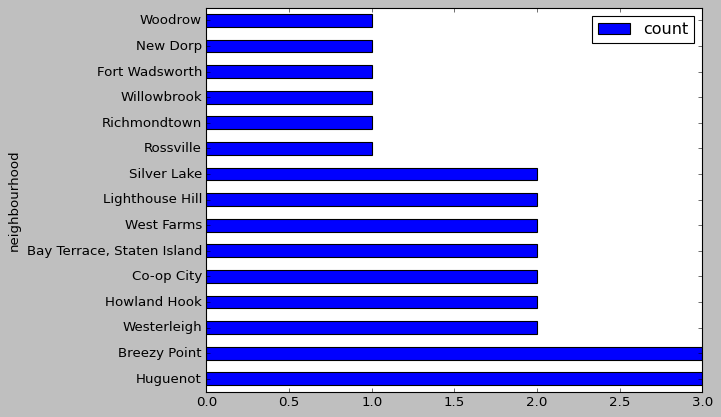

,count
neighbourhood,
Huguenot,3
Breezy Point,3
Westerleigh,2
Howland Hook,2
Co-op City,2
"Bay Terrace, Staten Island",2
West Farms,2
Lighthouse Hill,2
Silver Lake,2


In [ ]:
print('Least Listing number of count')
df5 = dataset.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.tail(15).plot(kind='barh')
plt.show()
pd.DataFrame(df5.tail(15))

##### 1. Why did you pick the specific chart?

Answer Here.

Bar-plot is very useful and easy graph to understand patterns. Barplot gives clear idea about the data to take business decision.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Average Price for rooms in neighbourhood group,Top 20 most expensive locality in Airbnb listing are,Least expensive neighbourhood according to Airbnb listings this types of data is need to be visualize to take business decisions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, the insights gained from the analysis of a bar plot in Airbnb booking analysis can help create a positive and negative business impact. Hosts can optimize their listings by identifying popular and less popular amenities. However, missing or poorly reviewed amenities can impact the booking experience and lead to a decrease in customer satisfaction and bookings.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

plt.figure(figsize=(15,8))
sns.scatterplot(y=dataset['price'],x=dataset['availability_365'])

<Axes: xlabel='availability_365', ylabel='price'>

##### 1. Why did you pick the specific chart?

Answer Here.

By plotting these variables against each other, you can identify any potential patterns or trends in the data, such as whether higher review scores are associated with higher listing prices, or whether higher occupancy rates are associated with more reviews.

Scatter plots can also be useful in identifying any potential outliers in the data, which are individual points that are far away from the general trend in the plot. Outliers can be important to consider in an Airbnb booking analysis, as they may indicate unusual or extreme cases that could be affecting the overall trends in the data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Insights gained from a scatter plot in an Airbnb booking analysis can include identifying positive or negative relationships between variables, determining whether these relationships are linear or non-linear, detecting any potential outliers in the data, and identifying clusters or patterns in the dataset. For example, a scatter plot might show that higher review scores are associated with higher listing prices, or that there is a diminishing return on investment for higher listing prices. These insights can be used to inform decisions around pricing, marketing, and customer satisfaction

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights gained from a scatter plot in an Airbnb booking analysis can have both positive and negative business impacts. By identifying positive relationships between variables such as higher review scores being associated with higher listing prices, businesses can optimize pricing strategies, improve customer satisfaction and drive revenue. However, detecting potential outliers, non-linear relationships or clusters of data might also highlight potential negative business impacts such as lower than expected occupancy rates or lower review scores than competitors.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
corr = dataset.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
dataset.columns


dataset.shape


dataset.head(15)

<ipython-input-69-4b80fc35ec9b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr(method='kendall')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


##### 1. Why did you pick the specific chart?

Answer Here.

A correlation heatmap is a useful way to visualize the correlations between multiple numerical variables in a dataset. It uses color coding to represent the strength and direction of the correlations between variables, with darker colors indicating stronger positive or negative correlations.

In an Airbnb booking analysis, a correlation heatmap can be used to investigate the relationships between variables such as listing price, number of bedrooms, and review scores

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Identifying weak or non-existent correlations: A correlation heatmap can also help identify variables that are weakly or not at all correlated with each other. For example, you might find that there is little correlation between listing price and the number of reviews a property has received, indicating that reviews may not be a strong predictor of price.

Identifying potential multicollinearity: A correlation heatmap can help identify variables that are highly correlated with each other, which can be an indication of multicollinearity. Multicollinearity can be a problem in statistical analyses such as regression, as it can lead to unstable estimates and unreliable results

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

sns.pairplot(dataset, hue="room_type")

##### 1. Why did you pick the specific chart?

Answer Here.

A pair plot, also known as a scatter plot matrix, is a useful way to visualize the relationships between multiple numerical variables in a dataset. Each scatter plot in the matrix displays the relationship between two variables, while the diagonal plots show the distribution of each variable. This allows you to quickly identify any patterns or trends in the data, as well as potential outliers.

In an Airbnb booking analysis, a pair plot can be used to visualize the relationships between variables such as listing price, number of bedrooms, and review scores

##### 2. What is/are the insight(s) found from the chart?

Answer Here

A pair plot can help identify patterns and relationships between multiple numerical variables in a dataset. By examining the scatter plots in the matrix, you can identify any potential correlations between variables, such as a positive correlation between listing price and the number of bedrooms. This information can be useful in making informed decisions around pricing and marketing.

In addition, a pair plot can help identify any potential outliers in the data. Outliers can be seen as individual points that are far away from the general trend in a scatter plot. Outliers can be important to consider in an Airbnb booking analysis, as they may indicate unusual or extreme cases that could be affecting the overall trends in the data.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

Based on the analysis of Airbnb booking data, several strategic recommendations emerge to assist the client in realizing their business objectives:

1. **Enhance Listing Quality:** Since a positive correlation exists between the number of reviews and booking prices, prioritizing the improvement of listing quality is crucial. The client should offer increased resources and guidance to hosts, empowering them to craft more appealing and high-quality listings.

2. **Prioritize Popular Neighborhoods:** Concentrating efforts on popular neighborhoods, such as Manhattan and Queens, presents an opportunity for the client to expand their reach. Acquiring more listings in these areas and enhancing the quality of existing ones could significantly boost bookings and overall revenue.

3. **Refine Pricing Strategy:** To align with user preferences and booking patterns, the client should consider optimizing their pricing strategy. Implementing dynamic pricing, which adjusts rates based on demand for different room types and neighborhoods, can enhance revenue, particularly during peak periods.

4. **Enhance User Experience:** Investing in technology and tools to streamline the booking process and foster better communication between hosts and guests is essential. Additionally, personalizing recommendations based on guest preferences and booking history can significantly elevate the overall user experience.

5. **Explore New Markets:** Expanding the platform into untapped markets or underserved neighborhoods offers potential for growth. This strategic move can attract new hosts and guests, thereby increasing revenue and market share for the client.

By diligently addressing these recommendations, the client stands to achieve their overarching business objectives of augmenting bookings, revenue, and user satisfaction.

# **Conclusion**

In summary, the examination of Airbnb booking data yields significant insights into user booking behaviors and preferences. By scrutinizing variables such as room type, neighborhood, and pricing, a comprehensive understanding of trends and patterns emerges, offering Airbnb actionable intelligence to refine their business strategy and enhance user satisfaction.

The analysis reveals that entire apartments are the most sought-after room type, followed by private rooms and shared rooms. Notably, Manhattan and Queens stand out as the most popular neighborhoods, boasting the highest number of listings per host. Moreover, a positive correlation between the number of reviews and booking prices underscores the willingness of guests to invest more in listings of superior quality.

In essence, this analysis equips Airbnb with valuable information to make informed, data-driven decisions for optimizing their business strategy and elevating the overall user experience. By aligning with user booking preferences, Airbnb can strategically allocate resources, maximize revenue, and foster an improved experience for both hosts and guests.Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***